In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
from PIL import Image

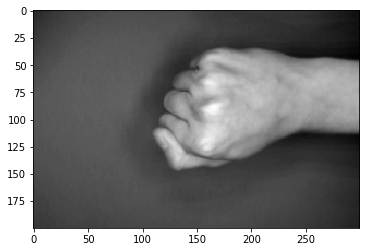

In [17]:
image = Image.open("./rock/eJ5fbY23rZWUULxO.png")
grayscale_image = image.convert("L")
grayscale_array = np.asarray(grayscale_image)
plt.imshow(grayscale_array, cmap="gray")

In [20]:
im_array = np.asarray(image)
im_array.shape

(200, 300, 3)

In [26]:
import os

In [30]:
import cv2

In [38]:
rock_dir = "./rock"
paper_dir = "./paper"
scissors_dir ="./scissors"

In [39]:
img_typ = ".png"

In [42]:
def get_images(path):
    image_list = []
    for filename in os.listdir(path):
        im=cv2.imread(os.path.join(path,filename),cv2.IMREAD_COLOR)
        new_im = cv2.resize(im, dsize=(100, 100))
        image_list.append(new_im)
    return image_list

In [43]:
image_list = get_images(paper_dir)
temp = np.array(image_list)

In [44]:
temp.shape

(712, 100, 100, 3)

In [45]:
len(temp)

712

In [47]:
np.average(temp[1,12,:,1])

120.19

In [48]:
np.average(temp[23,:,:,1])

134.2842

In [60]:
np.average(temp[23,:,:,2])

82.0705

In [53]:
for i in range(len(temp)):
    print(np.max(temp[i,:,:,0]))

157
136
143
153
159
140
132
150
171
164
242
159
157
132
150
235
139
146
172
106
144
149
194
137
147
161
161
140
161
194
248
179
165
153
154
183
156
152
134
167
209
158
173
181
144
147
175
142
154
169
161
124
156
134
153
178
180
153
179
180
169
170
192
206
151
156
129
151
163
152
155
152
172
148
153
151
219
188
193
121
151
168
166
139
175
184
168
153
146
160
155
145
231
235
180
204
134
139
160
141
154
135
160
240
161
164
167
155
143
157
162
150
186
170
148
196
170
150
157
155
175
157
145
168
186
191
129
164
201
160
135
212
159
163
174
149
144
165
136
168
144
160
174
132
162
135
131
121
169
166
155
167
163
148
144
141
196
149
173
177
169
249
153
160
173
158
177
161
195
176
150
151
158
130
154
182
165
114
174
156
198
190
166
139
161
152
145
162
122
141
174
150
112
202
145
189
145
191
188
167
156
156
163
175
192
144
142
167
158
120
201
166
174
147
167
176
166
165
187
129
159
199
162
186
171
170
133
164
153
180
165
171
158
147
134
171
157
204
190
151
151
161
166
142
204
164
116
171
164
166


In [63]:
np.min(np.cov(temp[1,:,:,1]))

-332.41494949494967

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2

In [65]:
rock_dir = "./rock"
paper_dir = "./paper"
scissors_dir ="./scissors"

In [66]:
def get_color_images(path):
    image_list = []
    for filename in os.listdir(path):
        im=cv2.imread(os.path.join(path,filename),cv2.IMREAD_COLOR)
        new_im = cv2.resize(im, dsize=(100, 100))
        image_list.append(new_im)
    return image_list

In [67]:
def get_bw_images(path):
    image_list = []
    for filename in os.listdir(path):
        im=cv2.imread(os.path.join(path,filename),cv2.IMREAD_GRAYSCALE)
        new_im = cv2.resize(im, dsize=(100, 100))
        image_list.append(new_im)
    return image_list

In [68]:
# create color array
color_ims = get_color_images(rock_dir)

In [69]:
# create grayscale array
bw_ims = get_bw_images(rock_dir)

In [70]:
# create list with all filenames
f_names = []
for f in os.listdir(rock_dir):
    f_names.append(f)

In [80]:
# create list len of filesnames array with category values = rock (0), paper (1) or scissor (2)
category_column = []
category = 0 # rock
category_column = [category for i in range(len(f_names))]

In [83]:
df = pd.DataFrame(list(zip(f_names, category_column)), columns =['name', 'category']) 

In [85]:
df.head()

,name,category
0,eJ5fbY23rZWUULxO.png,0
1,TLbqMqwDrww8CS0p.png,0
2,9kYPKMVtd4nOvSK4.png,0
3,N3pHY9fO1y0jdeVu.png,0
4,JXD8WyY4cQoEyvtU.png,0


In [100]:
# initiate all of arrays that will become columns in the dataframe
avg_red = []
avg_green = []
avg_blue = []
avg_bw = []
max_av_col_bw = []
min_avg_col_bw = []
max_avg_row_bw = []
min_avg_row_bw = []

In [101]:
# average red values
for i in range(len(color_ims)):
    avg_red.append(np.average(color_ims[i][:,:,0]))
# average green values
for i in range(len(color_ims)):
    avg_green.append(np.average(color_ims[i][:,:,1]))
# average blue values
for i in range(len(color_ims)):
    avg_blue.append(np.average(color_ims[i][:,:,2]))

In [103]:
df['avg_red'] = avg_red
df['avg_green'] = avg_green
df['avg_blue'] = avg_blue

In [105]:
df.describe()

,category,avg_red,avg_green,avg_blue
count,726.0,726.000000,726.000000,726.000000
mean,0.0,66.488181,141.269602,78.977192
std,0.0,13.922398,10.851672,11.478364
min,0.0,21.853900,93.226700,42.416300
25%,0.0,57.976775,134.670000,72.184275
50%,0.0,66.296750,138.018600,76.597550
75%,0.0,75.409775,145.113000,83.610325
max,0.0,111.012600,183.048300,126.399000


In [138]:
def bw_rows(arr):
    dims = arr.shape
    col_avgs = []
    for i in range(dims[1]):
        col_avgs.append(np.average(arr[:,i]))
    return np.max(col_avgs), np.min(col_avgs)

In [139]:
def bw_cols(arr):
    dims = arr.shape
    row_avgs = []
    for i in range(dims[0]):
        row_avgs.append(np.average(arr[i,:]))
    return np.max(row_avgs), np.min(row_avgs)

In [140]:
big_list = []
small_list= []
for x in range(len(bw_ims)):
    big = []
    small = []
    big, small = bw_rows(bw_ims[x])
    big_list.append(big)
    small_list.append(small)
max_avg_row_bw = big_list
min_avg_row_bw = small_list

In [141]:
big_list = []
small_list= []
for x in range(len(bw_ims)):
    big = []
    small = []
    big, small = bw_cols(bw_ims[x])
    big_list.append(big)
    small_list.append(small)
max_av_col_bw = big_list
min_avg_col_bw = small_list

In [144]:
len(min_avg_row_bw)

726

In [145]:
df['max_av_col_bw'] = max_av_col_bw
df['min_avg_col_bw'] = min_avg_col_bw
df['max_avg_row_bw'] = max_avg_row_bw
df['min_avg_row_bw'] = min_avg_row_bw

In [147]:
df.describe()

,category,avg_red,avg_green,avg_blue,max_av_col_bw,min_avg_col_bw,max_avg_row_bw,min_avg_row_bw
count,726.0,726.000000,726.000000,726.000000,726.000000,726.00000,726.000000,726.000000
mean,0.0,66.488181,141.269602,78.977192,137.530909,91.72522,142.616625,88.649242
std,0.0,13.922398,10.851672,11.478364,12.465877,12.15969,11.422440,15.968791
min,0.0,21.853900,93.226700,42.416300,96.900000,37.41000,116.440000,32.080000
25%,0.0,57.976775,134.670000,72.184275,129.962500,84.26250,136.022500,80.672500
50%,0.0,66.296750,138.018600,76.597550,135.295000,90.17000,140.225000,90.405000
75%,0.0,75.409775,145.113000,83.610325,142.855000,97.12750,146.725000,95.452500
max,0.0,111.012600,183.048300,126.399000,193.650000,136.04000,196.740000,136.400000
